### What we have learned in class so far

##### Hypothesis


In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

### Understanding the customer data

In [2]:
#reading the data
df = pd.read_csv("Customers.Csv")
df.head() # the dataset

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [3]:
df.Profession #reading the profession 

0          Healthcare
1            Engineer
2            Engineer
3              Lawyer
4       Entertainment
            ...      
1995           Artist
1996           Doctor
1997       Healthcare
1998        Executive
1999    Entertainment
Name: Profession, Length: 2000, dtype: object

### Let's explore our data 

In [4]:
#summary of the data
df.describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500,50.962500,4.102500,3.768500
std,577.494589,28.429747,45739.536688,27.934661,3.922204,1.970749
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,500.750000,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,1000.500000,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,1500.250000,73.000000,149092.750000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


In [5]:
#Explore some features
adf = df [['Age','Annual Income ($)','Work Experience','Family Size']]
adf.head()

,Age,Annual Income ($),Work Experience,Family Size
0,19,15000,1,4
1,21,35000,3,3
2,20,86000,1,1
3,23,59000,0,2
4,31,38000,2,6


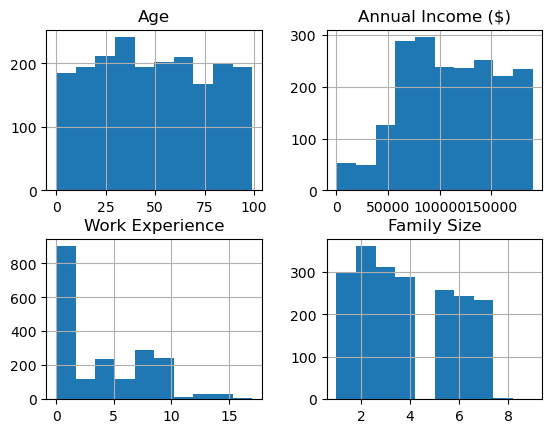

In [6]:
vis = adf [['Age','Annual Income ($)','Work Experience','Family Size']]
vis.hist()
plt.show()

Relationship between age and Annual income

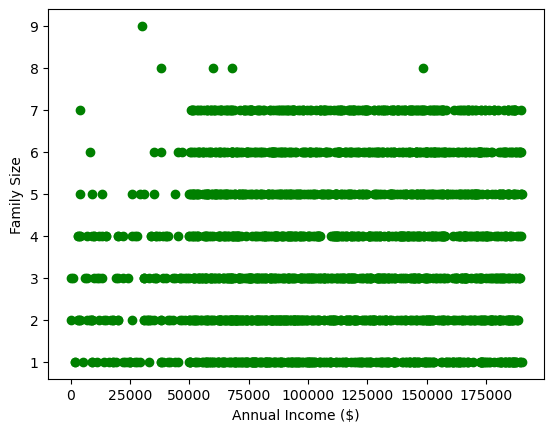

In [19]:
plt.scatter(adf["Annual Income ($)"], adf["Family Size"], color='green')
plt.xlabel("Annual Income ($)")
plt.ylabel("Family Size")
plt.show()

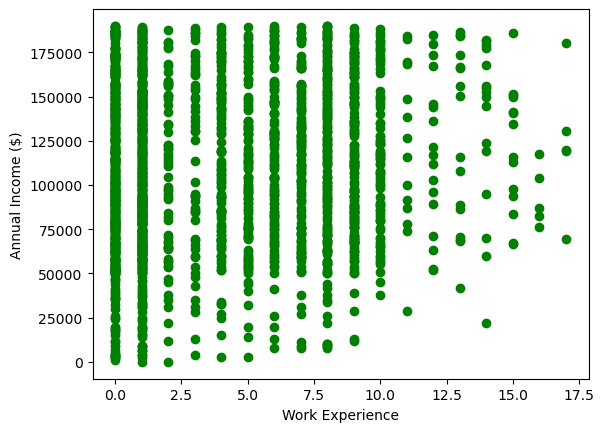

In [8]:
plt.scatter(adf["Work Experience"], adf["Annual Income ($)"], color='green')
plt.xlabel("Work Experience")
plt.ylabel("Annual Income ($)")
plt.show()

In [13]:
# Initialize the label encoder
le = LabelEncoder()

# Apply label encoder to the categorical columns
df['Gender'] = le.fit_transform(df['Gender'])
df['Profession'] = le.fit_transform(df['Profession'])

# Generate the correlation matrix
correlation_matrix = df.corr()
print(correlation_matrix)

                        CustomerID    Gender       Age  Annual Income ($)  \
CustomerID                1.000000  0.004520  0.070700           0.328400   
Gender                    0.004520  1.000000  0.005821           0.004701   
Age                       0.070700  0.005821  1.000000           0.021378   
Annual Income ($)         0.328400  0.004701  0.021378           1.000000   
Spending Score (1-100)    0.018936 -0.000528 -0.041798           0.023299   
Profession                0.002925  0.008862 -0.022848           0.020446   
Work Experience           0.091574  0.020651 -0.014319           0.089136   
Family Size               0.159655  0.000228  0.038254           0.093005   

                        Spending Score (1-100)  Profession  Work Experience  \
CustomerID                            0.018936    0.002925         0.091574   
Gender                               -0.000528    0.008862         0.020651   
Age                                  -0.041798   -0.022848        -0.

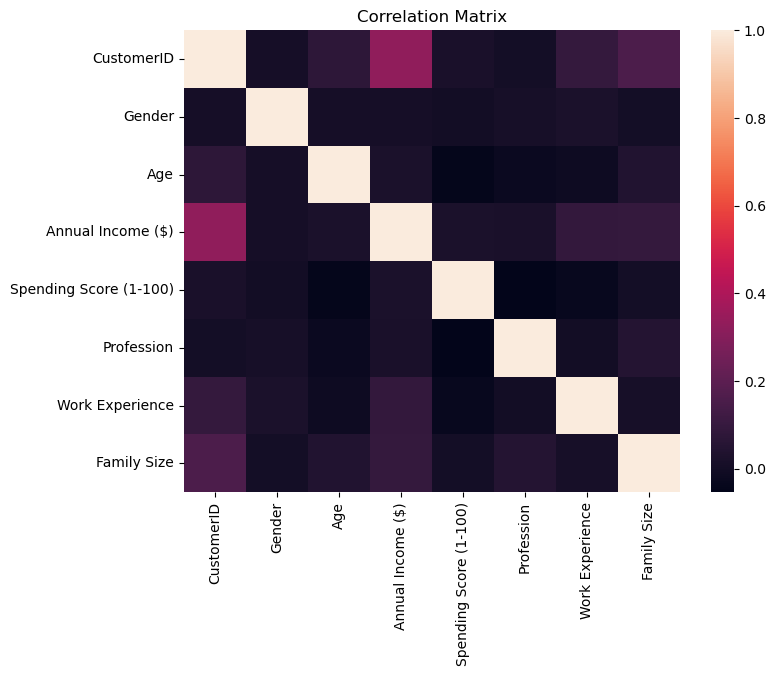

In [16]:
# Visualize correction matrix using heatmap
plt.figure(figsize = (8,6))
sns.heatmap(correlation_matrix) #learn more about hyperparameters
plt.title("Correlation Matrix")
plt.show()


In [17]:
# convert correction to long format and sort values
corr_pairs = correlation_matrix.unstack()
sorted_pairs = corr_pairs.sort_values(kind="quicksort",ascending=False)

top_corr = sorted_pairs[sorted_pairs < 1].drop_duplicates().head(5)
print(top_corr)


CustomerID       Annual Income ($)    0.328400
                 Family Size          0.159655
Family Size      Annual Income ($)    0.093005
Work Experience  CustomerID           0.091574
                 Annual Income ($)    0.089136
dtype: float64


### Creating the train and test dataset
We create using np.random.rand() function:

In [ ]:
msk = np.random.rand(len(df)) < 0.8

In [ ]:
msk

In [ ]:
len(msk)

In [ ]:
count = 0
for a in range(len(msk)):
    if(msk[a] == True):
        count = count + 1
print(count)        
        

In [ ]:
1630/2000

In [ ]:
train = adf[msk] #80% of the records
test = adf[~msk] #20% of the records

### Simple Regression Model
Linear Regression fits a linear model with coefficients

### Train data distribution


In [ ]:
# age and annual income
plt.scatter(adf["Age"], adf["Annual Income ($)"], color='green')
plt.xlabel("Age")
plt.ylabel("Annual Income ($)")
plt.show()

### Modeling 
using sklearn packages to model the data

In [ ]:
from sklearn import linear_model

regr = linear_model.LinearRegression()

train_x = np.asanyarray(train[['Age']])
train_y = np.asanyarray(train[['Annual Income ($)']])

#train the model
regr.fit(train_x, train_y)
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

In [ ]:
plt.scatter(train['Age'], train['Annual Income ($)'], color='green')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Age")
plt.ylabel("Annual Income ($)")

In [ ]:
regr.coef_[0][0]*2 + regr.intercept_[0]

### Evaluation
Getting the:
Mean Absolute Error
Mean Squared Error(MSE)
Root Mean Squared Error (RMSE)



In [20]:
from sklearn.metrics import r2_score


# Assuming test is a DataFrame and regr is a trained model

test_x = np.asanyarray(test[['Age']])
test_y_actual = np.asanyarray(test[['Annual Income ($)']])
test_y_predicted = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_actual - test_y_predicted)))
print("Mean squared error: %.2f" % np.mean((test_y_actual - test_y_predicted) ** 2))
print("R2-score: %.2f" % r2_score(test_y_actual, test_y_predicted))

NameError: name 'test' is not defined